<a href="https://colab.research.google.com/github/PDeySarkar103/XAS/blob/main/XAS_103__DISSERTATION_SDSS_Classification_using_ML_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from warnings import filterwarnings
filterwarnings(action='ignore')

# Loading Datasets

In [ ]:
!pip install astroquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 909.7/909.7 kB 17.0 MB/s eta 0:00:00


In [ ]:
from astroquery.sdss import SDSS

query = """SELECT TOP 500000
p.objid,p.ra,p.dec,p.u,p.g,p.r,p.i,p.z,
 p.run, p.rerun, p.camcol, p.field,
s.specobjid, s.class, s.z as redshift,
s.plate, s.mjd, s.fiberid
FROM PhotoObj AS p
JOIN SpecObj AS s ON s.bestobjid = p.objid
"""
res = SDSS.query_sql(query, data_release=18)
df = res.to_pandas()
df.to_csv('SDSS18.csv')

In [ ]:
#from google.colab import files
#uploaded=files.upload()

In [ ]:
#df=pd.read_csv('SDSS_DR18.csv')

In [ ]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666210854536279,267.693275,25.382464,21.43812,20.14254,19.53728,19.27723,19.11268,4828,301,4,125,2.470235e+18,b'STAR',-0.000848,2194,53904,40
1,1237661958293029652,195.497352,51.631548,23.92653,22.86720,21.38509,20.37984,19.71321,3838,301,3,18,9.258423e+18,b'GALAXY',0.645810,8223,57429,537
2,1237660961328399002,137.277106,33.357736,21.32821,21.11290,19.40331,18.65184,18.21766,3606,301,2,89,6.542734e+18,b'QSO',1.788380,5811,56334,470
3,1237657401347080781,142.626900,46.437122,25.66283,21.77463,19.96837,19.10381,18.61791,2777,301,3,237,8.386941e+18,b'GALAXY',0.556863,7449,56740,409
4,1237680272036856545,334.465468,19.450123,24.37361,22.09721,21.83834,20.69851,20.00554,8102,301,3,68,8.532155e+18,b'GALAXY',0.782655,7578,56956,309


In [ ]:
df.shape

(500000, 18)

# EDA(Exploratory Data Analysis)

In [ ]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   objid      500000 non-null  int64  
 1   ra         500000 non-null  float64
 2   dec        500000 non-null  float64
 3   u          500000 non-null  float64
 4   g          500000 non-null  float64
 5   r          500000 non-null  float64
 6   i          500000 non-null  float64
 7   z          500000 non-null  float64
 8   run        500000 non-null  int64  
 9   rerun      500000 non-null  int64  
 10  camcol     500000 non-null  int64  
 11  field      500000 non-null  int64  
 12  specobjid  500000 non-null  float64
 13  class      500000 non-null  object 
 14  redshift   500000 non-null  float64
 15  plate      500000 non-null  int64  
 16  mjd        500000 non-null  int64  
 17  fiberid    500000 non-null  int64  
dtypes: float64(9), int64(8), object(1)
memory usage: 68.7+ MB


In [ ]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.0,500000.000000,500000.000000,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000
mean,1.237665e+18,173.725555,24.439295,21.483929,20.034922,19.208810,18.578901,18.197196,4497.378724,301.0,3.225532,183.921964,5.742631e+18,0.574172,5100.373386,55575.790826,440.043686
std,8.550057e+12,95.853100,19.760323,77.653858,76.332500,63.389214,67.966754,72.258328,1990.716686,0.0,1.616077,140.091037,3.285634e+18,0.726179,2918.211824,1798.960334,273.475268
min,1.237646e+18,0.000095,-18.865961,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,109.000000,301.0,1.000000,11.000000,2.994897e+17,-0.010932,266.000000,51608.000000,1.000000
25%,1.237658e+18,126.774704,6.465092,20.322987,18.905925,18.050072,17.645827,17.382252,2986.000000,301.0,2.000000,83.000000,2.865449e+18,0.066212,2545.000000,54259.000000,209.000000
50%,1.237664e+18,173.578989,23.307357,22.184140,21.091520,20.104010,19.380170,18.976470,4263.000000,301.0,3.000000,148.000000,5.617241e+18,0.425663,4989.000000,55882.000000,417.000000
75%,1.237670e+18,229.795827,40.007579,23.709723,22.124200,21.008880,20.332693,19.870840,5598.000000,301.0,5.000000,246.000000,8.192219e+18,0.688519,7276.000000,56713.000000,639.000000
max,1.237681e+18,359.999810,84.490494,32.781390,31.602240,31.990100,32.141470,29.514250,8162.000000,301.0,6.000000,1000.000000,1.412694e+19,7.051930,12547.000000,58932.000000,1000.000000


In [ ]:
df['class'].nunique() # Shows no. of unique entries in the class column

3

In [ ]:
df['class'].unique() # The unique elements in class column

array([b'STAR', b'GALAXY', b'QSO'], dtype=object)

In [ ]:
df['class'].value_counts()

b'GALAXY'    305541
b'STAR'      101539
b'QSO'        92920
Name: class, dtype: int64

# Visualization of Data

In [ ]:
sns.set(style='darkgrid',palette='dark')

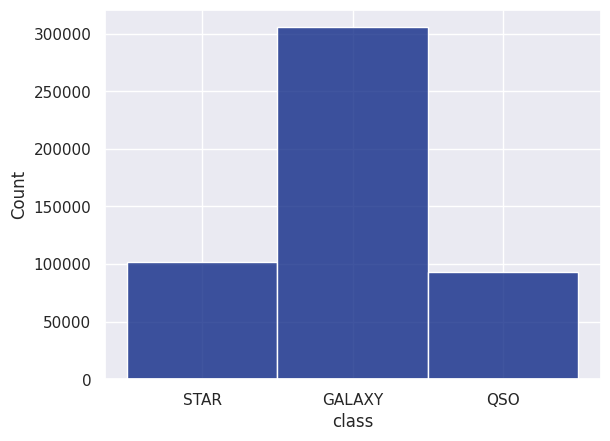

In [ ]:
sns.histplot(x=df['class'])
plt.show()

<Axes: >

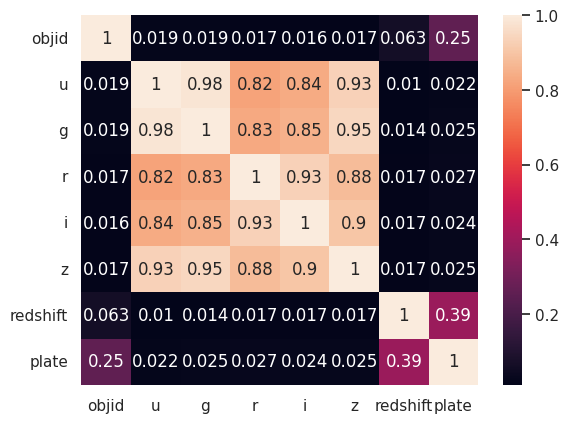

In [ ]:
# Heatmap for expressing correlation
sns.heatmap(df.drop(['ra','dec','run','rerun','camcol','field','specobjid','mjd','fiberid'],axis = 1).corr(),annot = True)

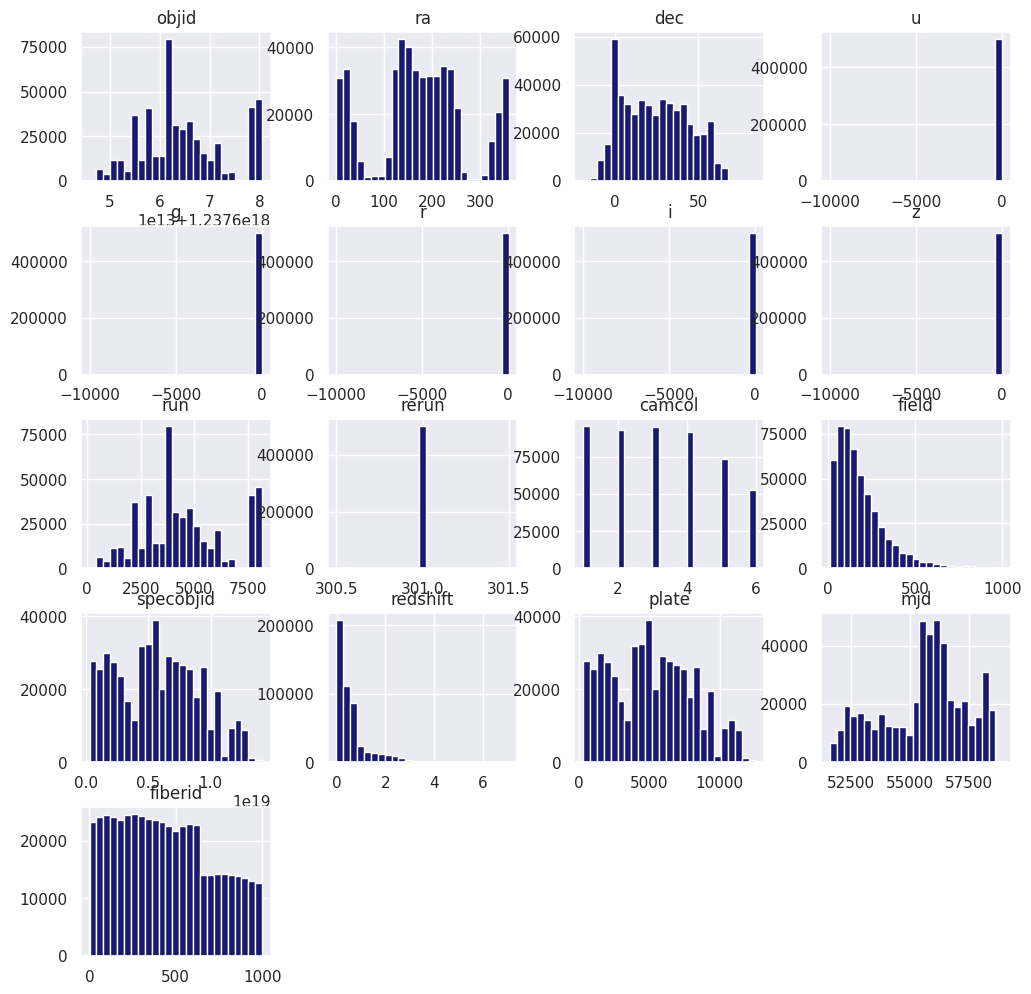

In [ ]:
df.hist(bins=25,figsize=(12,12),color='midnightblue')
plt.show()

# Feature Selection

In [ ]:
X=df[['u','g','r','i','z','redshift','plate']]
X

,u,g,r,i,z,redshift,plate
0,21.43812,20.14254,19.53728,19.27723,19.11268,-0.000848,2194
1,23.92653,22.86720,21.38509,20.37984,19.71321,0.645810,8223
2,21.32821,21.11290,19.40331,18.65184,18.21766,1.788380,5811
3,25.66283,21.77463,19.96837,19.10381,18.61791,0.556863,7449
4,24.37361,22.09721,21.83834,20.69851,20.00554,0.782655,7578
...,...,...,...,...,...,...,...
499995,21.03035,20.68018,20.39981,20.40346,20.60271,0.960005,8368
499996,21.18568,20.49474,20.30836,20.20802,19.77335,0.793478,6620
499997,24.63731,23.21765,22.56659,21.93382,21.39948,1.044041,9238
499998,26.56003,21.46900,19.85326,18.86810,18.32430,0.559413,5065


In [ ]:
Y=df['class']
Y

0           b'STAR'
1         b'GALAXY'
2            b'QSO'
3         b'GALAXY'
4         b'GALAXY'
            ...    
499995       b'QSO'
499996       b'QSO'
499997    b'GALAXY'
499998    b'GALAXY'
499999      b'STAR'
Name: class, Length: 500000, dtype: object

# Encoding

In [ ]:
#encoder={'GALAXY':1,'STAR':0,'QSO':2}
#df['class']=df['class'].map(encoder)

In [ ]:
#df['class'].value_counts()

In [ ]:
# We can also use scikit learn for this
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
Y=LE.fit_transform(Y)

In [ ]:
Y

array([2, 0, 1, ..., 0, 0, 2])

In [ ]:
# GALAXY= 0
# QSO   = 1
# STAR  = 2

In [ ]:
df['class'].value_counts()

b'GALAXY'    305541
b'STAR'      101539
b'QSO'        92920
Name: class, dtype: int64

# Resampling

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 30, k_neighbors = 5)
X_res, Y_res = sm.fit_resample(X, Y)

In [ ]:
#Y_res.value_counts()

# Splitting Datasets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_res,Y_res,test_size=0.25,random_state=30)

In [ ]:
X_train

,u,g,r,i,z,redshift,plate
498196,22.140320,21.537570,21.353580,21.380420,20.926540,2.508158,8742
542721,22.614446,21.624860,21.681729,21.615207,21.221271,2.384246,3782
794654,23.810087,23.246289,22.106297,21.058859,20.694748,-0.000736,2912
788286,17.947068,17.105229,16.787941,16.689899,16.645356,-0.000413,7431
647812,21.639337,21.214565,21.016883,20.734851,20.565693,2.180158,8738
...,...,...,...,...,...,...,...
328599,21.801960,21.663320,21.174620,20.977430,20.672890,1.394451,7681
570508,23.049205,21.735509,20.580889,19.599176,19.047292,0.560902,4552
885236,20.057081,18.062593,17.344776,17.074193,16.946670,0.000308,277
572333,21.570274,21.729463,21.679764,21.421167,21.363414,1.788422,8179


In [ ]:
y_train

array([1, 1, 2, ..., 2, 1, 0])

# Classification Algorithms

In [ ]:
# Creating a dataframe to store the accuracy scores of all the classification algorithms so that we are able to choose the best one

score_df=pd.DataFrame(columns=['Algorithm','Recall_Score'])

## Logistic Regression

In [ ]:
# Training the ML model

from sklearn.linear_model import LogisticRegression

model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

y_pred1=model.predict(X_test)

Text(46.25, 0.5, 'Prediction')

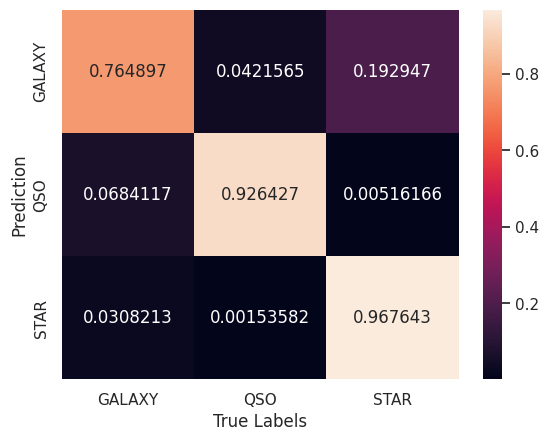

In [ ]:
# Generating the confusion matrix

from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,y_pred1,normalize='true')
sns.heatmap(cm_lr,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

In [ ]:
# Getting the Recall score

from sklearn.metrics import recall_score
LR_score=recall_score(y_test,y_pred1,average='weighted')
#print(LR_score)
# Adding Recall Score to the table

score_df=score_df.append({'Algorithm':'Logistic Regression','Recall_Score':LR_score},ignore_index=True)
score_df

,Algorithm,Recall_Score
0,Logistic Regression,0.886104


## Decision Tree

In [ ]:
# Training the ML model

from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(criterion='gini',random_state=30)
model.fit(X_train,y_train)

y_pred2=model.predict(X_test)

Text(46.25, 0.5, 'Prediction')

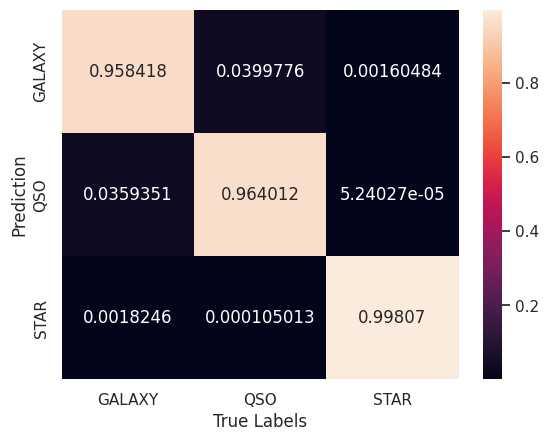

In [ ]:
# Generating the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm_dt=confusion_matrix(y_test,y_pred2,normalize='true')

sns.heatmap(cm_dt,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

In [ ]:
# Getting the Recall score

from sklearn.metrics import recall_score
dt_score=recall_score(y_test,y_pred2,average='weighted')
#print(LR_score)
# Adding Recall Score to the table

score_df=score_df.append({'Algorithm':'Decision Tree','Recall_Score':dt_score},ignore_index=True)
score_df

,Algorithm,Recall_Score
0,Logistic Regression,0.886104
1,Decision Tree,0.973463


## Random Forest

In [ ]:
# First, we'll create a dataframe where we'll store recall score of random forest algorithm with different values of n_estimators
# Then, we'll choose the maximum one and consider that as the recall score

rf_df=pd.DataFrame(columns=['Estimators','Recall score'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

for i in range(1,31):
  model=RandomForestClassifier(criterion='gini',n_estimators=i,random_state=30)
  model.fit(X_train,y_train)
  y_pred3=model.predict(X_test)
  rf_df=rf_df.append({'Estimators':i,'Recall score':recall_score(y_test,y_pred3,average='weighted')},ignore_index=True)


In [ ]:
rf_df

,Estimators,Recall score
0,1.0,0.969165
1,2.0,0.971696
2,3.0,0.979075
3,4.0,0.979734
4,5.0,0.980982
5,6.0,0.981410
6,7.0,0.981990
7,8.0,0.981925
8,9.0,0.982200
9,10.0,0.982361


In [ ]:
# Sorting

rf_df=rf_df.sort_values(by='Recall score',ascending=False)
rf_df.head()

,Estimators,Recall score
29,30.0,0.983238
24,25.0,0.983238
26,27.0,0.983225
25,26.0,0.983195
28,29.0,0.983186


The above table shows that the recall score is highest for n=29.0. So we'll keep n_estimators=29.0

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=29,random_state=30)
model.fit(X_train,y_train)
y_pred3=model.predict(X_test)

from sklearn.metrics import recall_score
rf_score=recall_score(y_test,y_pred3,average='weighted')
rf_score

0.9831861264815235

In [ ]:
# Adding accuracy to the data frame
score_df=score_df.append({'Algorithm':'Random Forest','Recall_Score':rf_score},ignore_index=True)
score_df

,Algorithm,Recall_Score
0,Logistic Regression,0.886104
1,Decision Tree,0.973463
2,Random Forest,0.983186


Text(46.25, 0.5, 'Prediction')

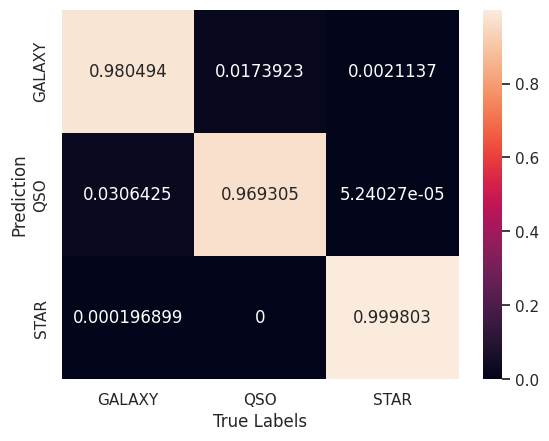

In [ ]:
# Generating the confusion matrix
from sklearn.metrics import confusion_matrix

cm_rf=confusion_matrix(y_test,y_pred3,normalize='true')

sns.heatmap(cm_rf,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

## KNN

In [ ]:
# We'll create a dataframe to store recall score of K Neighbour Classifiers with different n_neighbour values.
# From there, we shall choose the maximum one and consider that as recall score for KNN algo.

knn_df=pd.DataFrame(columns=['Neighbors','Recall Score'])

In [ ]:
# Algorithm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score

for i in range(1,31):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  y_pred4=model.predict(X_test)
  knn_df=knn_df.append({'Neighbors':i,'Recall Score':recall_score(y_test,y_pred4,average='weighted')},ignore_index=True)

knn_df

,Neighbors,Recall Score
0,1.0,0.950121
1,2.0,0.936297
2,3.0,0.938243
3,4.0,0.931256
4,5.0,0.930026
5,6.0,0.925195
6,7.0,0.924095
7,8.0,0.920081
8,9.0,0.919147
9,10.0,0.915049


In [ ]:
knn_df=knn_df.sort_values(by='Recall Score',ascending=False)
knn_df.head()

,Neighbors,Recall Score
0,1.0,0.950121
2,3.0,0.938243
1,2.0,0.936297
3,4.0,0.931256
4,5.0,0.930026


Here, we see the recall score is maximum for n=3.0 Hence, we will choose n=3.0

In [ ]:
# KNN algo for n_neighbors=3.0

from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred4=model.predict(X_test)

from sklearn.metrics import recall_score
knn_score=recall_score(y_test,y_pred4,average='weighted')
print(knn_score)

0.93824294367156


In [ ]:
score_df=score_df.append({'Algorithm':'KNN','Recall_Score':knn_score},ignore_index=True)
score_df

,Algorithm,Recall_Score
0,Logistic Regression,0.886104
1,Decision Tree,0.973463
2,Random Forest,0.983186
3,KNN,0.938243


Text(46.25, 0.5, 'Prediction')

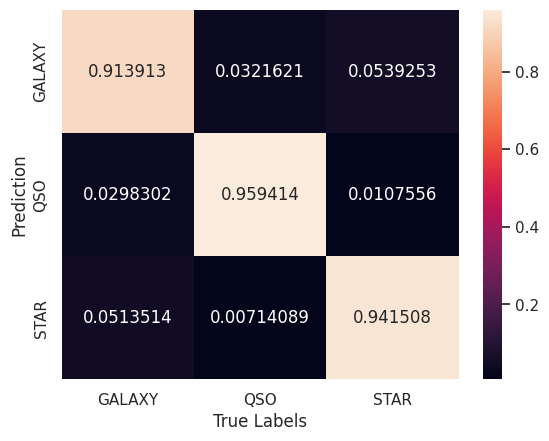

In [ ]:
# Viewing the Confusion matrix
from sklearn.metrics import confusion_matrix

cm_knn=confusion_matrix(y_test,y_pred4,normalize='true')

sns.heatmap(cm_knn,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

## SVM

# Neural Networks

## Artificial Neural Network(ANN)

First, we shall do th feature selection again

### Feature Selection

In [ ]:
Xr=df[['u','g','r','i','z','redshift','plate']]
yr=df['class']

Here, we need to reencode the class as follows.

### Re-encode

In [ ]:
from keras.utils import to_categorical
l_encode=LabelEncoder()
l_encode.fit(yr)
Yr=l_encode.transform(yr)
Yr=to_categorical(Yr)

Resampling the data

## Resampling the data

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 30, k_neighbors = 5)
X_r, Y_r = sm.fit_resample(Xr, Yr)

Now, we shall split to training and testing data set

### Splitting to training and testing data set

In [ ]:
from sklearn.model_selection import train_test_split
Xr_train, Xr_test, yr_train, yr_test= train_test_split(X_r,Y_r,test_size=0.25,random_state=210)

In [ ]:
Xr_train.shape,Xr_test.shape,yr_train.shape,yr_test.shape

((687467, 7), (229156, 7), (687467, 3), (229156, 3))

Now, we shall make the model. For that we have to import th following

### Making the model

In [ ]:
import tensorflow as tf
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.models import Sequential

Now, we shall start with the model.

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(128,input_dim=Xr_train.shape[1],activation='relu'),
    tf.keras.layers.Dense(48,activation='relu'),
    #tf.keras.layers.Dense(32,activation='relu'),
    #tf.keras.layers.Dense(15,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax'),
    ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 48)                6192      
                                                                 
 dense_2 (Dense)             (None, 3)                 147       
                                                                 
Total params: 7363 (28.76 KB)
Trainable params: 7363 (28.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compiling the model

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(Xr_train,yr_train,validation_data=(Xr_test,yr_test),epochs=40,verbose=0)

<Axes: >

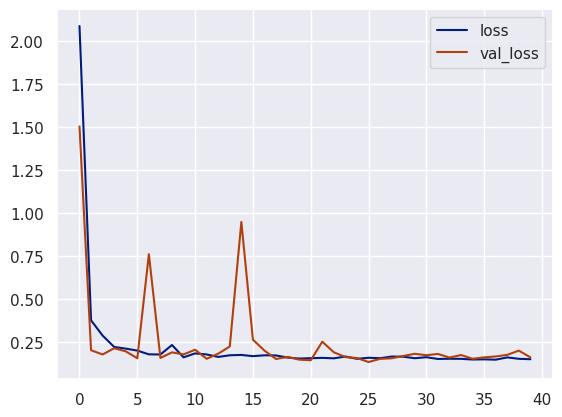

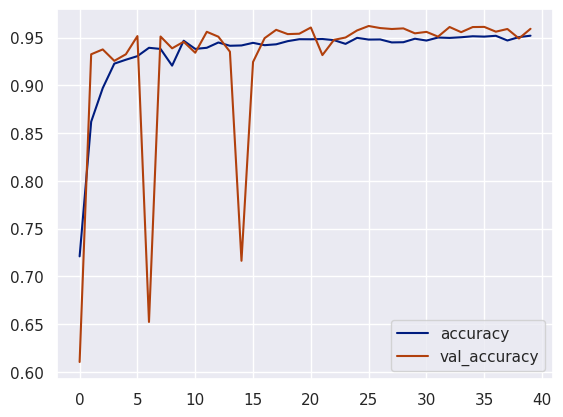

In [ ]:
model_loss_acc = pd.DataFrame(model.history.history)
model_loss_acc[['loss', 'val_loss']].plot()
model_loss_acc[['accuracy', 'val_accuracy']].plot()

### Evaluating the model's accuracy

In [ ]:
y_pred6=np.round(model.predict(Xr_test))

7162/7162 [==============================] - 11s 2ms/step


In [ ]:
y_pred6

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
from sklearn.metrics import recall_score

ann_score=recall_score(yr_test,y_pred6,average='weighted')
ann_score

0.9592897414861492

In [ ]:
score_df=score_df.append({'Algorithm':'ANN','Recall_Score':ann_score},ignore_index=True)
score_df

,Algorithm,Recall_Score
0,Logistic Regression,0.886104
1,Decision Tree,0.973463
2,Random Forest,0.983186
3,KNN,0.938243
4,ANN,0.959290


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Recall_Score'].plot(kind='hist', bins=20, title='Recall_Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Algorithm').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='Recall_Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Recall_Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Algorithm')):
  _plot_series(series, series_name, i)
  fig.legend(title='Algorithm', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Recall_Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Algorithm')):
  _plot_series(series, series_name, i)
  fig.legend(title='Algorithm', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Recall_Score'].plot(kind='line', figsize=(8, 4), title='Recall_Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['Algorithm'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='Algorithm', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Algorithm'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Recall_Score', y='Algorithm', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
score_df.sort_values(by='Recall_Score')
score_df.head()

,Algorithm,Recall_Score
0,Logistic Regression,0.886104
1,Decision Tree,0.973463
2,Random Forest,0.983186
3,KNN,0.938243
4,ANN,0.959290


In [ ]:
y_pred6.shape

(229156, 3)

In [ ]:
yr_test

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0]])

In [ ]:
#confusion_matrix(preds2.argmax(axis = 1), yr_test.argmax(axis = 1))

#plt.figure(figsize = (6,6))
#from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
#ConfusionMatrixDisplay.from_predictions(yr_test.argmax(axis = 1), y_pred6.argmax(axis = 1), display_labels = ['GALAXY', 'QUASAR', 'STAR'])

Text(46.25, 0.5, 'Prediction')

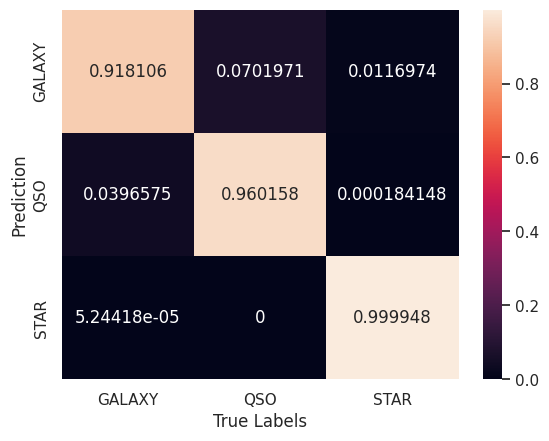

In [ ]:
# Viewing the Confusion matrix
from sklearn.metrics import confusion_matrix

cm_ann=confusion_matrix(yr_test.argmax(axis=1),y_pred6.argmax(axis=1),normalize='true')

sns.heatmap(cm_ann,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

# Comparing all the algorithms

Text(153.75, 0.5, 'Prediction')

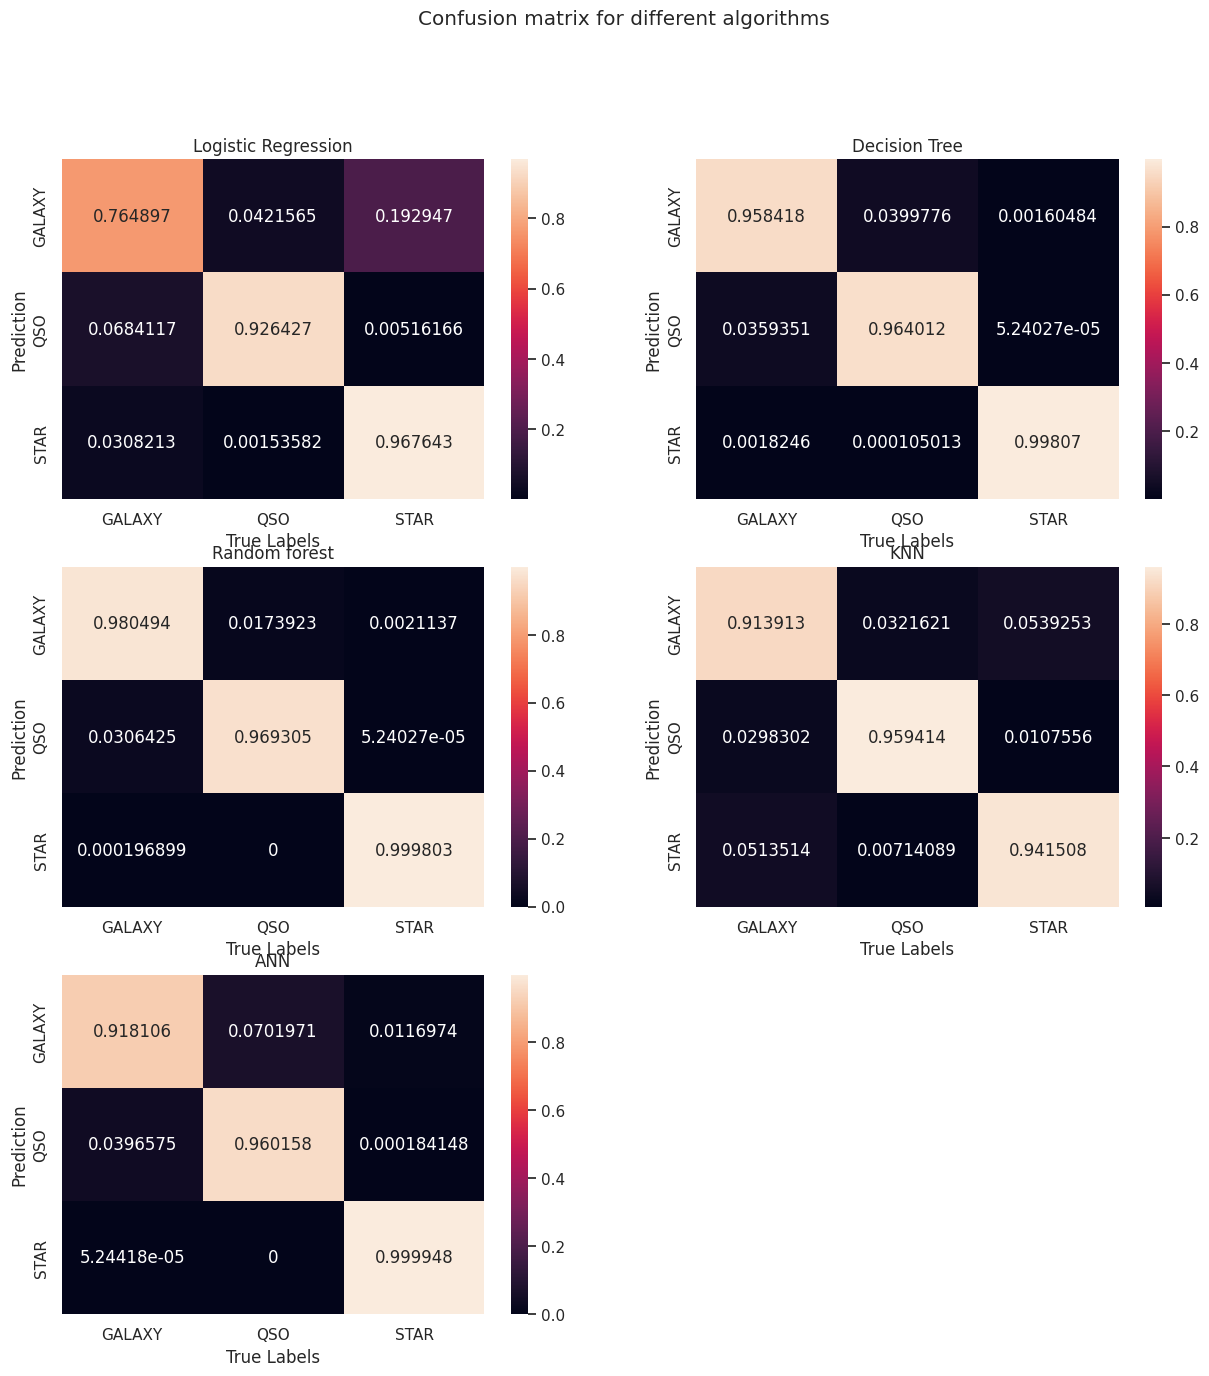

In [ ]:
plt.figure(figsize=(15,15))
plt.suptitle('Confusion matrix for different algorithms')

plt.subplot(321)
plt.title('Logistic Regression')
sns.heatmap(cm_lr,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

plt.subplot(322)
plt.title('Decision Tree')
sns.heatmap(cm_dt,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

plt.subplot(323)
plt.title('Random forest')
sns.heatmap(cm_rf,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

plt.subplot(324)
plt.title('KNN')
sns.heatmap(cm_knn,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

plt.subplot(325)
plt.title('ANN')
sns.heatmap(cm_ann,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')